# Semester Project: Climate Change
#### Team 9: Alyssa Carnes; Shannon Leroi; Matthew August Krieger
Modeling global warming data and predicting the trend

# Part 1: Data Importing, Cleaning & Analyzation 

In [1]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
from datetime import datetime

In [2]:
#loading in our data
tempdata = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1)
edata = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_511927/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_511927.csv', skiprows=3)

In [169]:
#data range
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')
t = pd.DataFrame(date_rng, columns=['date'])
# Create column for anomaly temperatures- anomaly is data that deviates from what is expected 
t['Avg_Anomaly_deg_C'] = None
# Index
t.set_index('date', inplace=True)
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [4]:
tempdata = tempdata.iloc[:,:13]
tempdata.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29


In [170]:
def anomalyfromrow(row):
    year = row['Year']
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        t.loc[date_index] = monthly_anomolies[month]
_ = tempdata.apply(lambda row: anomalyfromrow(row), axis=1)
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [171]:
# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN    
# Apply above function to all anomaly values in DataFrame
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean(raw_value))
# 'Forward fill' to take care of NaN values
t.fillna(method='ffill', inplace=True)
# Show the first few elements of our newly cleaned DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


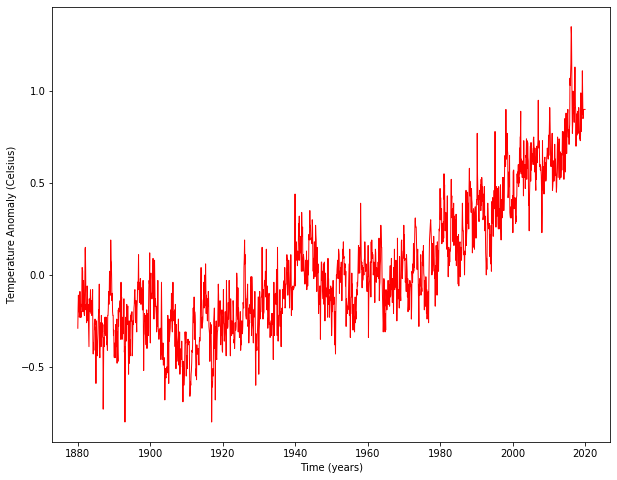

In [172]:
# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomaly (Celsius)')
plt.plot(t, color='Red', linewidth=1.0)

In [173]:
t.resample('A').mean().head()  #changes from months to the end of each calendar year. Below is documentation and info
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


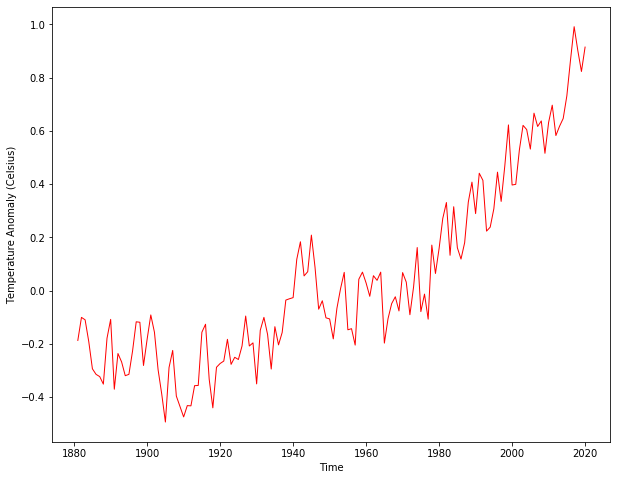

In [174]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (Celsius)')
plt.plot(t.resample('A').mean(), color='Red', linewidth=1.0)

In [175]:
# function to pull values from raw data
def populate(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
raw_e_world = edata[edata['Country Name']=='World'].loc[:,'1960':'2018']
# Traspose the resulting slice to make the rows go into columns
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']
# New DataFrame with a daterange the same the range for the tempdata (resampling)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])
# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


In [188]:
e[e.index.year>2010]

,Global CO2 Emissions per Capita
date,
2011-12-31,4.975363
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,4.980707
2016-12-31,4.980707
2017-12-31,4.980707
2018-12-31,4.980707


In [189]:
e.fillna(method='ffill', inplace=True) #need to fill in the empty values. using this technique .fillna
e[e.index.year>2010]

,Global CO2 Emissions per Capita
date,
2011-12-31,4.975363
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,4.980707
2016-12-31,4.980707
2017-12-31,4.980707
2018-12-31,4.980707


In [178]:
e['1984-01-04':'1990-01-06'] #index to view 

,Global CO2 Emissions per Capita
date,
1984-12-31,4.024779
1985-12-31,4.074093
1986-12-31,4.124274
1987-12-31,4.152156
1988-12-31,4.226610
1989-12-31,4.243794


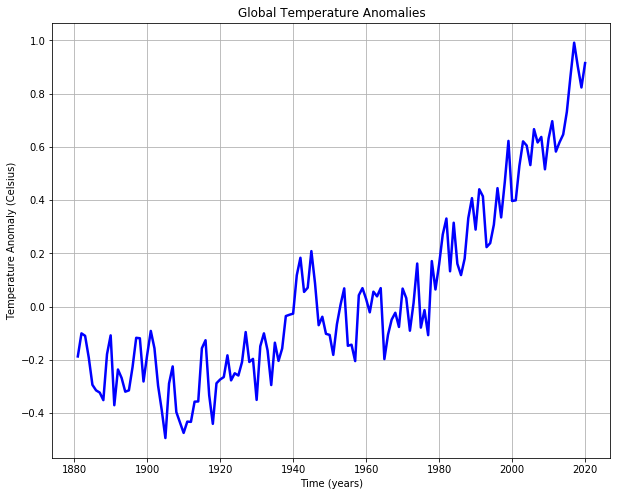

In [180]:
# Resample or temperature data to years (this resample is set for the end of the year conversion)
t_resampled = t.resample('A').mean()
#now plot the data to get a visual for what is going on
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_resampled, color='Blue', linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (Celsius)',
       title='Global Temperature Anomalies')
ax.grid()

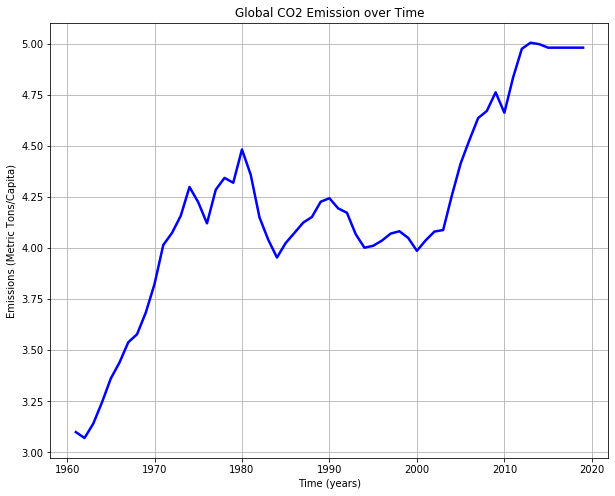

In [181]:
#plot of C02 data to visualize and see what is going on 
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(e, color='Blue', linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons/Capita)',
       title='Global CO2 Emission over Time')
ax.grid()

In [17]:
pip install plotly --upgrade

Requirement already up-to-date: plotly in /Users/alyssacarnes/anaconda3/lib/python3.7/site-packages (4.3.0)
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install cufflinks

In [ ]:
#pip install fbprophet

It failed to install on my jupter notebook, so used this command instead in my terminal: conda install -c conda-forge fbprophet

In [182]:
import chart_studio as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [21]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='Red',
                  yTitle='Temperature Anomaly (Celsius)', title='Global Temperature Anomalies')

In [183]:
e.iplot(kind='line', xTitle='Time (years)', color='Blue',
                  yTitle='Emissions (Metric Tons/Capita)', title='Global CO2 Emission over Time')


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


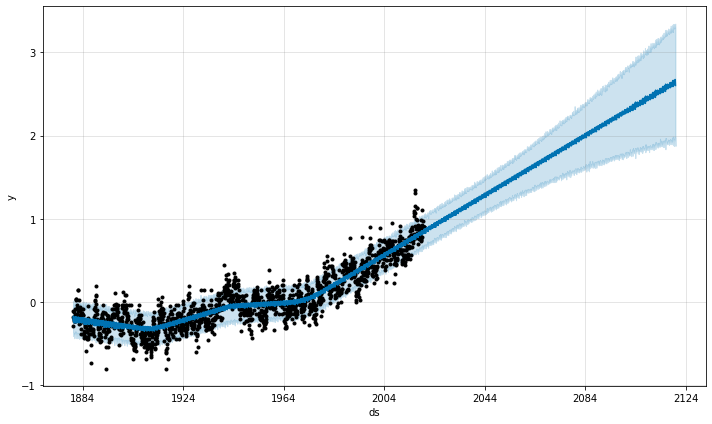

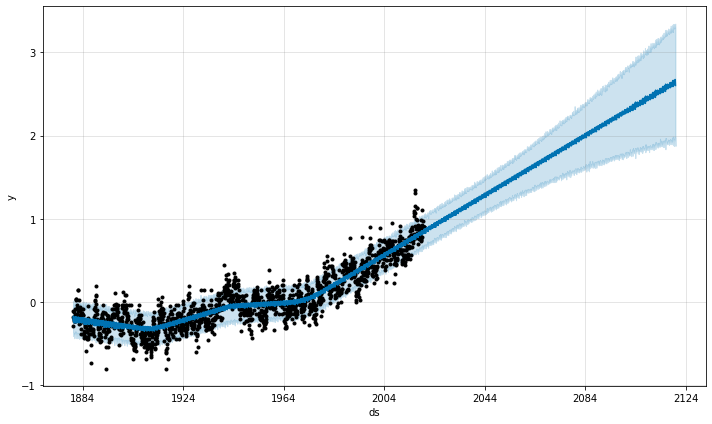

In [23]:
# Import Facebook's Prophet forecasting library
from fbprophet import Prophet
# Create a new DataFrame with which we will create/train our Prophet model 
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values

# Instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(t_prophet)

# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

# Plot the resulting forecast
m.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


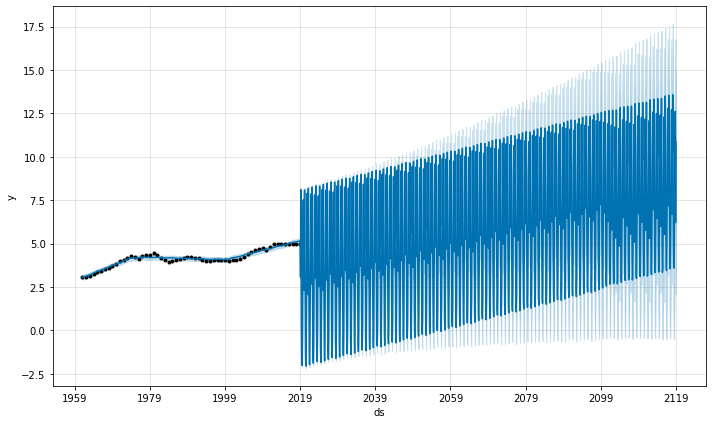

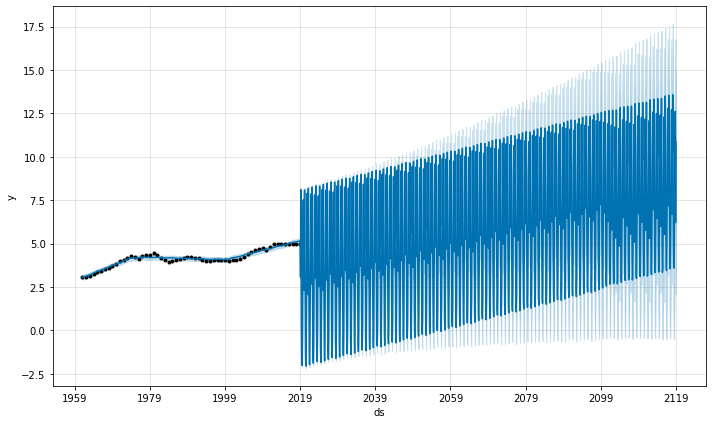

In [190]:
# Import Facebook's Prophet forecasting library
from fbprophet import Prophet
# Create a new DataFrame with which we will create/train our Prophet model 
e_prophet = pd.DataFrame()
e_prophet['ds'] = e.index
e_prophet['y'] = e['Global CO2 Emissions per Capita'].values
# Instantiate model and fit to data (just like with sklearn model API)
x= Prophet()
x.fit(e_prophet)
# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future1 = x.make_future_dataframe(freq='m', periods=100*12)
forecast1 = x.predict(future1)
# Plot the resulting forecast
x.plot(forecast1)

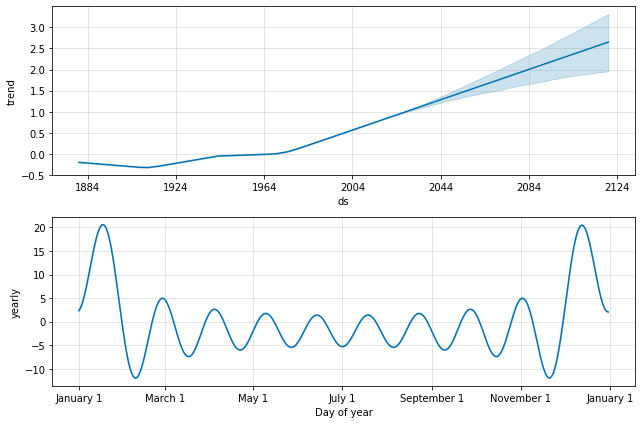

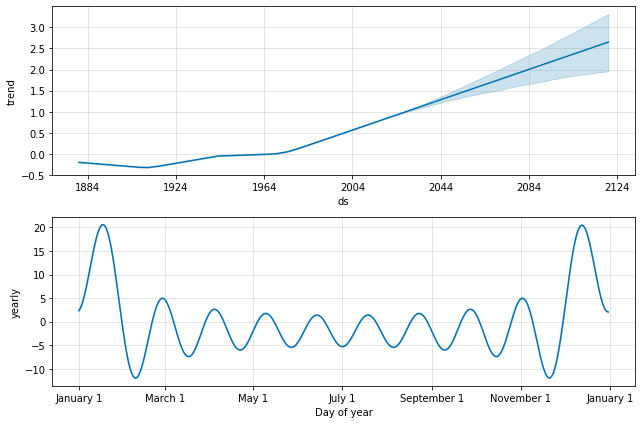

In [130]:
m.plot_components(forecast)

# Check out correlation

In [25]:
#lets look at the size of our current datasets so we know how we need to resize them for correlation model
print(len(e))
print(len(t_resampled))

59
140


In [26]:
#we need our temperature and co2 datasets to be the same size
t1_final=t_resampled[80:]
len(t1_final)
t1_final.tail()

,Avg_Anomaly_deg_C
date,
2015-12-31,0.865833
2016-12-31,0.991667
2017-12-31,0.902500
2018-12-31,0.823333
2019-12-31,0.915000


In [27]:
t_final=t1_final.drop(t1_final.index[len(t1_final)-1])
t_final.tail()

,Avg_Anomaly_deg_C
date,
2014-12-31,0.731667
2015-12-31,0.865833
2016-12-31,0.991667
2017-12-31,0.902500
2018-12-31,0.823333


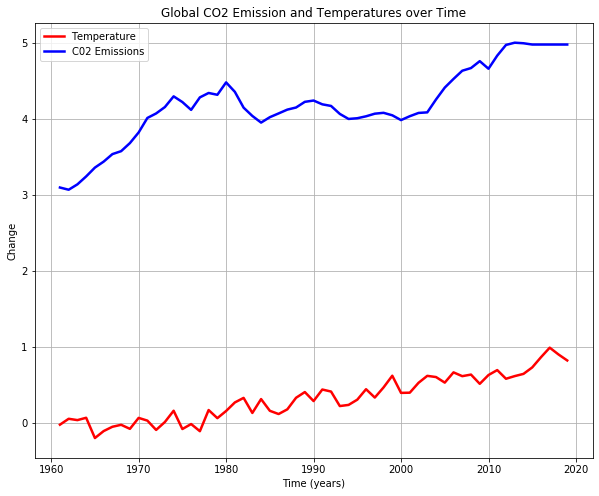

In [197]:
#Now plot both Co2 data and temp data to see what they look like in comparison to each other
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_final, color='Red', linewidth=2.5,label='Temperature')
ax.set(xlabel='Time (years)', ylabel='Change',
       title='Global Temperature Anomalies')
ax.plot(e, color='blue', linewidth=2.5,label='C02 Emissions')
ax.set(xlabel='Time (years)', ylabel='Change',
       title='Global CO2 Emission and Temperatures over Time')
ax.grid()
ax.legend()

In [29]:
#Correlation model: using scipy.stats Spearman 
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# calculate spearman's correlation
corr, _ = spearmanr(t_final, e)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.685


# Regression & Data Fitting (Ontop of what we already performed...extra model)

In [152]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

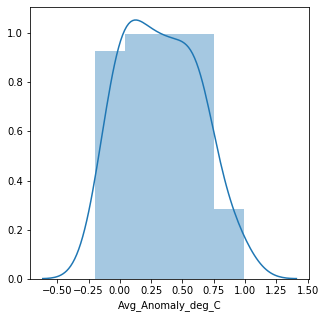

In [153]:
import seaborn as sns
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(t_final['Avg_Anomaly_deg_C'])

In [154]:
X = t_final['Avg_Anomaly_deg_C'].values.reshape(-1,1)
Y = e['Global CO2 Emissions per Capita'].values.reshape(-1,1)
#Y = t_final['Avg_Anomaly_deg_C'].values.reshape(-1,1)
#X1=t1_final['date'].values.reshape(-1,1)

In [155]:
date_rng1=date_rng
# Categorical boolean mask
categorical_feature_mask1 = date_rng1.dtype== 'datetime64[ns]'
# filter categorical columns using mask and turn it into a list


In [156]:

# # Categorical boolean mask
# categorical_feature_mask = X.dtypes== 'float64'
# # filter categorical columns using mask and turn it into a list
# categorical_cols = X[categorical_feature_mask]

In [157]:
# # import labelencoder
# from sklearn.preprocessing import LabelEncoder
# # instantiate labelencoder object
# le = LabelEncoder()

In [158]:
# # apply le on categorical feature columns
# X1 = X1.apply(lambda col: le.fit_transform(col))
# X1[categorical_cols].head(10)

In [161]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

the intercept of our model is [3.80886063]
the slope of our model is [[1.28785762]]


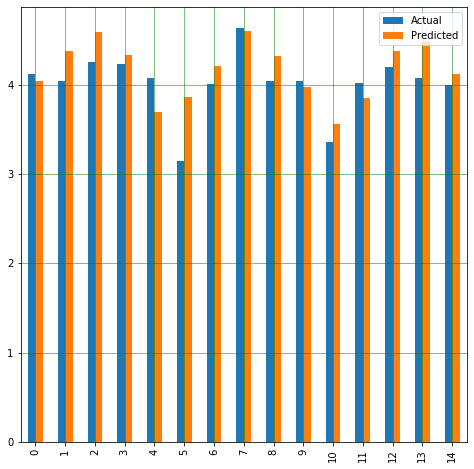

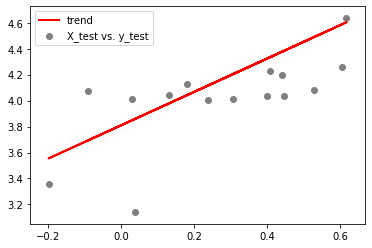

In [198]:
#Model from online
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print('the intercept of our model is',regressor.intercept_)
#For retrieving the slope:
print('the slope of our model is',regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test,  color='gray',label='X_test vs. y_test')
plt.plot(X_test, y_pred, color='red', linewidth=2,label='trend')
plt.legend()
plt.show()

In [163]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [164]:
# from scipy import stats
# from datetime import datetime
# std_dev = 3
# df = t_final[(np.abs(stats.zscore(t_final)) < float(std_dev)).all(axis=1)]
# df.plot(figsize=(18,5))

In [165]:
# X1 = pd.DataFrame(t_final['Avg_Anomaly_deg_C'])
# X1['Avg_Anomaly_deg_C'] = X1.index.date
# # drop_first = True removes multi-collinearity
# add_var = pd.get_dummies(X1['Avg_Anomaly_deg_C'], prefix='Avg', drop_first=True)
# # Add all the columns to the model data
# X = X1.join(add_var)
# # Drop the original column that was expanded
# #X.drop(columns=['Avg_Anomaly_deg_C'], inplace=True)
# X.head()

In [187]:
from sklearn.model_selection import KFold
X = pd.DataFrame(e['Global CO2 Emissions per Capita'])
y = pd.DataFrame(t_final['Avg_Anomaly_deg_C'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.7213102965731627, 0.4963840984994514, 0.26148134783033494]
